<a href="https://colab.research.google.com/github/youngyoung0511/Sound-AI/blob/main/1114_Onset_DrunSpecialization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# setting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%%capture
!pip install PyWavelets librosa matplotlib numpy
import librosa
import numpy as np
import matplotlib.pyplot as plt
import pywt


In [ ]:
# 필수 라이브러리 설치
!pip install librosa numpy matplotlib


# onset - drum specialization

'/content/drive/My Drive/soundAI/BoysLikeGirls.mp3'

MagicCarpetRide_drum.mp3

Every Day.mp3

music.mp3 //꿈나라별나라


1. 오디오 불러오기

In [ ]:
audio_path = '/content/drive/My Drive/soundAI/MagicCarpetRide_drum.mp3'  # 여기에 mp3 파일 경로를 입력하세요
y, sr = librosa.load(audio_path, sr=None)


In [ ]:
print(sr)

44100


In [ ]:
print(hop_length)

512


In [ ]:
# 음원의 절반만 사용
half_length = len(y) // 2
y_half = y[:half_length]  # 앞 절반

# 2. 주파수 변환 적용-cwt

특정 드럼 요소의 주파수 대역에 맞춰 CWT 적용

음원의 뒷 절반만 사용
y_half = y[half_length:]  # 뒷 절반

웨이블릿 스케일 조정

In [ ]:
# 샘플링 레이트 줄이기
y, sr = librosa.load(audio_path, sr=16000)  # 샘플링 레이트를 16kHz로 다운샘플링


Processing Ride Cymbal with frequency range (300, 4000) Hz...


/usr/local/lib/python3.10/dist-packages/pywt/_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


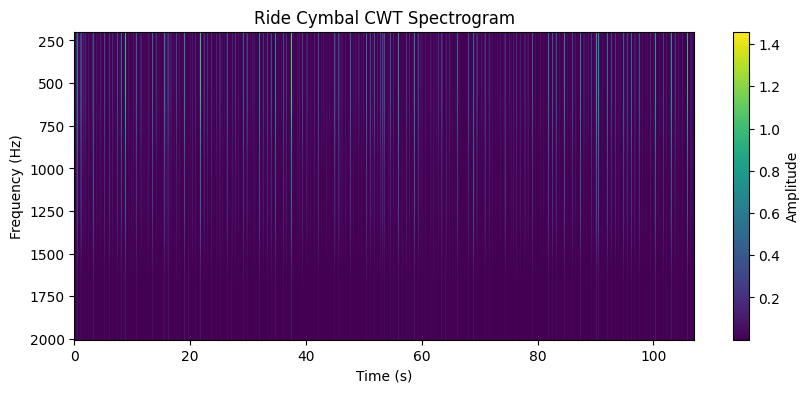

Processing Crash Cymbal with frequency range (400, 8000) Hz...


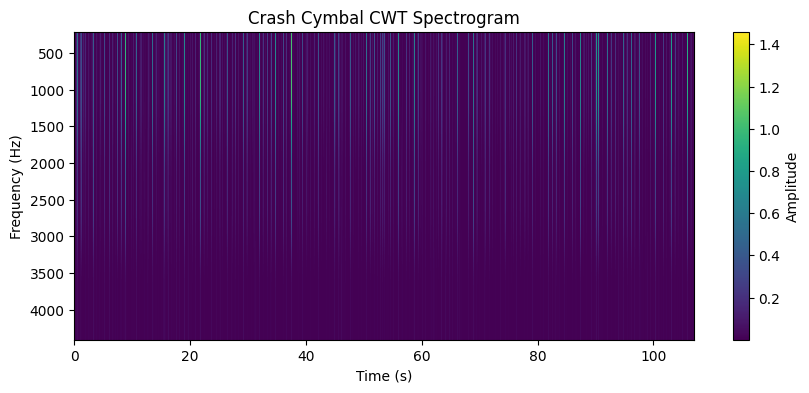

Processing Hi-Hat with frequency range (2000, 8000) Hz...


<ipython-input-7-737e705f4f21>:48: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.imshow(np.abs(coefficients), extent=[0, len(y_half)/sr, frequencies[-1], frequencies[0]],


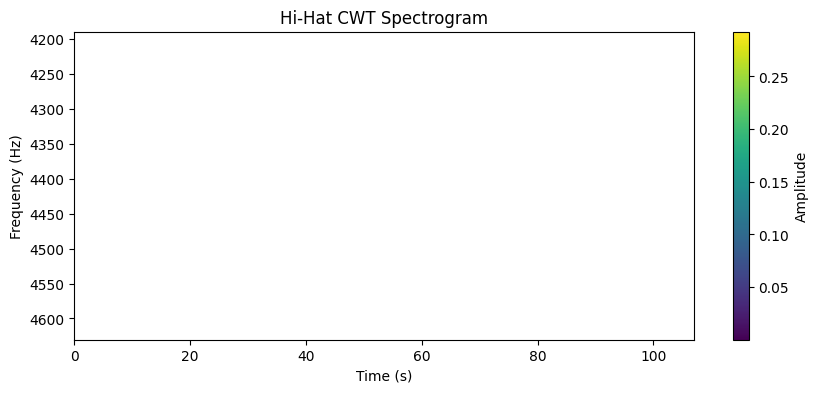

Processing Snare Drum with frequency range (100, 2000) Hz...


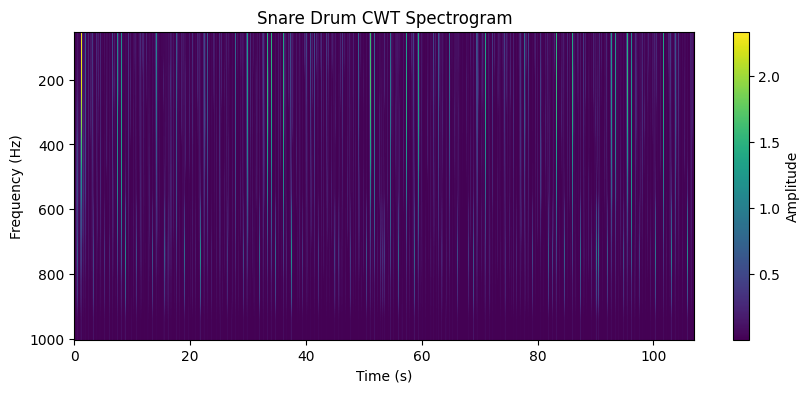

Processing Kick Drum with frequency range (20, 100) Hz...


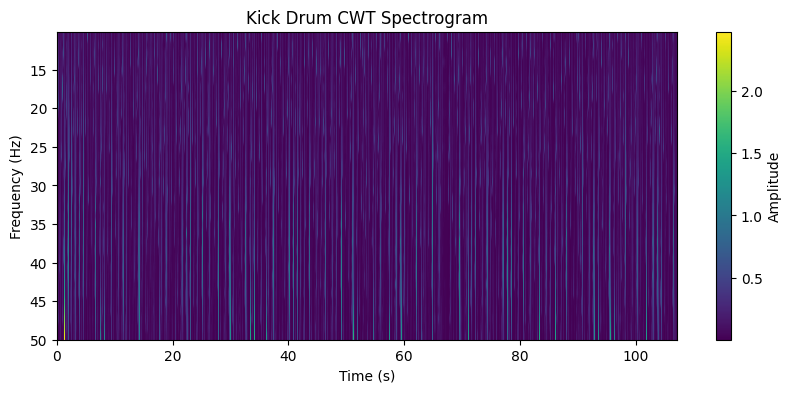

Processing Floor Tom with frequency range (50, 200) Hz...


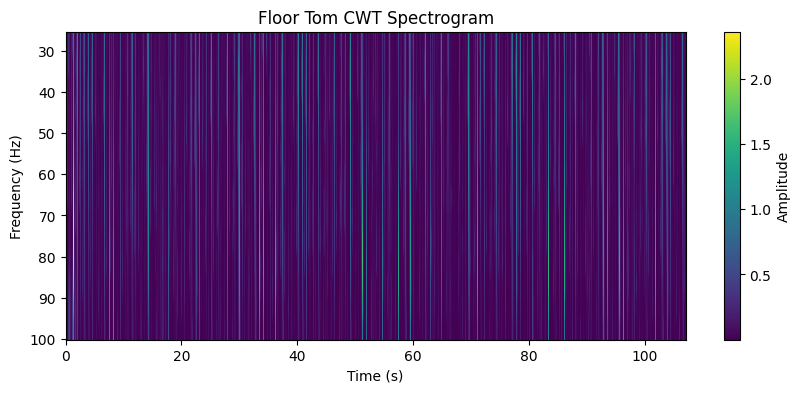

Processing Mid Tom with frequency range (80, 300) Hz...


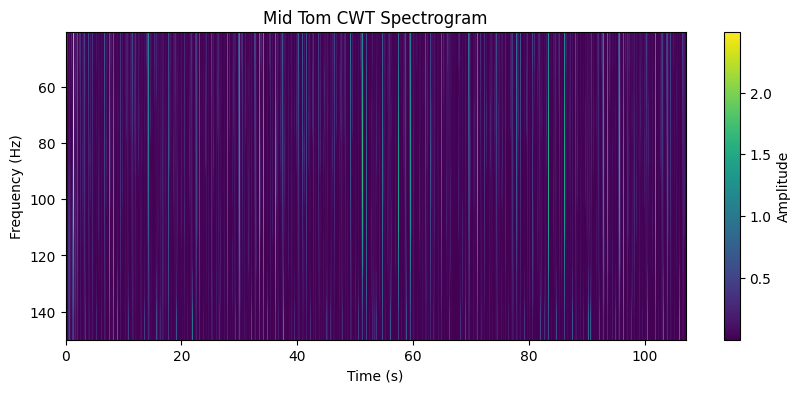

Processing High Tom with frequency range (100, 400) Hz...


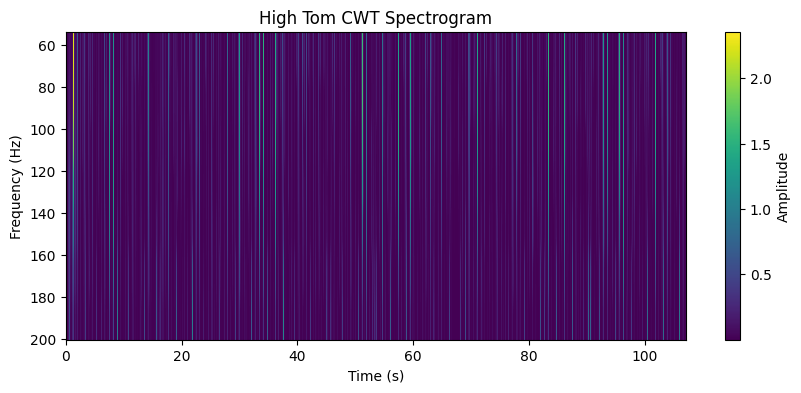

In [ ]:
import librosa
import pywt
import numpy as np
import matplotlib.pyplot as plt

# 드럼 요소별 주파수 대역과 스케일 계산 함수
def calculate_scales(freq_range, sr, step=10):
    sampling_interval = 1 / sr  # 샘플링 간격
    center_frequency = 1.0  # cmor 웨이블릿의 중심 주파수 (기본값)

    min_scale = center_frequency / (freq_range[1] * sampling_interval)
    max_scale = center_frequency / (freq_range[0] * sampling_interval)

    return np.arange(int(min_scale), int(max_scale), step)  # 스케일 범위 반환

# 드럼 요소별 주파수 대역 (Hz)
drum_frequencies = {
    "Ride Cymbal": (300, 4000),
    "Crash Cymbal": (400, 8000),
    "Hi-Hat": (2000, 8000),
    "Snare Drum": (100, 2000),
    "Kick Drum": (20, 100),
    "Floor Tom": (50, 200),
    "Mid Tom": (80, 300),
    "High Tom": (100, 400),
}



# CWT 결과 저장용 딕셔너리
cwt_results = {}

# 드럼 요소별 CWT 변환 및 저장
for drum, freq_range in drum_frequencies.items():
    print(f"Processing {drum} with frequency range {freq_range} Hz...")

    # 스케일 계산
    scales = calculate_scales(freq_range, sr, step=50)  # 스케일 스텝을 10으로 줄임

    # CWT 수행
    coefficients, frequencies = pywt.cwt(y_half, scales, 'cmor', sampling_period=1/sr)

    # CWT 결과를 딕셔너리에 저장
    cwt_results[drum] = (coefficients, frequencies)

    # 시각화
    plt.figure(figsize=(10, 4))
    plt.imshow(np.abs(coefficients), extent=[0, len(y_half)/sr, frequencies[-1], frequencies[0]],
               aspect='auto', cmap='viridis')
    plt.colorbar(label='Amplitude')
    plt.title(f'{drum} CWT Spectrogram')
    plt.ylabel('Frequency (Hz)')
    plt.xlabel('Time (s)')
    plt.gca().invert_yaxis()  # 주파수 축 반전
    plt.show()


In [ ]:
print(cwt_results)

{'Ride Cymbal': (array([[ 5.7656525e-05+5.52031124e-05j,  3.6413989e-05+7.16474242e-05j,
         1.0658696e-05+8.38621709e-05j, ...,
        -1.3522226e-03-1.19522956e-04j, -1.2725042e-03-4.40428354e-04j,
        -1.0580881e-03-6.94674905e-04j],
       [-7.2443117e-06+2.48026754e-05j,  2.5171199e-05+2.50781741e-05j,
         2.0384998e-06+2.21112332e-05j, ...,
        -7.1095180e-04-5.46783500e-04j, -6.8932888e-04-6.62241480e-04j,
        -7.4690470e-04-8.42964218e-04j],
       [ 2.2257505e-05+3.98526572e-05j,  3.1767875e-05+3.46256493e-05j,
        -1.8772986e-05+3.39713806e-05j, ...,
        -2.0361710e-03+3.77054181e-04j, -2.2729589e-03+2.64234754e-04j,
        -2.0114619e-03+2.58195389e-04j]], dtype=complex64), array([2004.54545455,  361.47540984,  198.64864865])), 'Crash Cymbal': (array([[ 9.9146942e-05-2.5825497e-05j,  1.1012486e-04+4.5004017e-05j,
         6.6038083e-05+1.0866474e-04j, ...,
        -2.4011284e-04+1.4270390e-03j, -1.2735400e-03+8.4069924e-04j,
        -1.5024873

In [ ]:
save_cwt_to_csv(cwt_results, output_dir="cwt_results")


Saved CWT result for Ride Cymbal to cwt_results/Ride Cymbal_cwt.csv
Saved CWT result for Crash Cymbal to cwt_results/Crash Cymbal_cwt.csv
Saved CWT result for Hi-Hat to cwt_results/Hi-Hat_cwt.csv
Saved CWT result for Snare Drum to cwt_results/Snare Drum_cwt.csv
Saved CWT result for Kick Drum to cwt_results/Kick Drum_cwt.csv


KeyboardInterrupt: 

In [ ]:
# CSV 파일 불러오기
df = pd.read_csv("cwt_results/Kick Drum_cwt.csv", index_col="Frequency (Hz)")
print(df.head())


CWT 느리면 일단 STFT 적용할 거임
아 cwt 되긴 함... 근데 22분 걸림 하

In [ ]:
import pandas as pd

# CWT 결과를 CSV로 저장하는 함수
def save_cwt_to_csv(cwt_results, output_dir="cwt_results"):
    """
    cwt_results 딕셔너리를 각 드럼 요소별로 CSV 파일로 저장합니다.

    Args:
    - cwt_results: 드럼 요소별 CWT 결과 딕셔너리.
    - output_dir: CSV 파일이 저장될 디렉토리.
    """
    import os
    os.makedirs(output_dir, exist_ok=True)  # 출력 디렉토리 생성

    for drum, (coefficients, frequencies) in cwt_results.items():
        # CWT 계수를 DataFrame으로 변환
        df = pd.DataFrame(data=np.abs(coefficients), index=frequencies)  # 절대값 사용
        df.index.name = "Frequency (Hz)"
        df.columns = [f"Time_{i}" for i in range(df.shape[1])]

        # 파일 저장
        output_path = os.path.join(output_dir, f"{drum}_cwt.csv")
        df.to_csv(output_path)
        print(f"Saved CWT result for {drum} to {output_path}")

In [ ]:
################
#1. 스펙트로그램을 주파수 성분과 시계열 성분으로 분리

import numpy as np

"""
    PLCA 알고리즘을 사용해
    입력 스펙트로그램을
    주파수 성분 + 시계열 성분으로 분해

    Args:
    - spectrogram: 입력 스펙트로그램 (CWT 변환 결과, 비음수 값이어야 함)
    - num_components: 분리할 성분의 개수 (드럼 요소 개수) 8
    - num_iterations: EM 알고리즘의 반복 횟수

    Returns:
    - freq_components: 주파수 성분 (num_frequencies x num_components)
    - time_components: 시계열 성분 (num_components x num_time_points)
"""


# PLCA 알고리즘 정의
def plca(spectrogram, num_components=8, num_iterations=100):

    # 초기화: 주파수 성분과 시계열 성분을 랜덤하게 생성
    # 스펙트로그램의 크기
    num_frequencies, num_time_points = spectrogram.shape
    # 비음수 주파수 성분
    freq_components = np.random.rand(num_frequencies, num_components)
    # 시계열 성분
    time_components = np.random.rand(num_components, num_time_points)

    # 입: CWT로 변환된 스펙트로그램

    for _ in range(num_iterations):
        approx = np.dot(freq_components, time_components)  # 복원된 스펙트로그램

        # E-step: 관측값에 대한 가중치 계산
        weights = spectrogram / (approx + 1e-9)  # 안정화를 위해 작은 값을 추가

        # M-step: 주파수 성분, 시계열 성분 업데이트
        freq_components *= np.dot(weights, time_components.T)
        time_components *= np.dot(freq_components.T, weights)

        # 정규화
        freq_components /= np.sum(freq_components, axis=0)
        time_components /= np.sum(time_components, axis=1, keepdims=True)

    return freq_components, time_components



2. 드럼 요소 별 PLCA 적용

In [ ]:
plca_results = {}
for drum, (coefficients, frequencies) in cwt_results.items():
    print(f"Applying PLCA for {drum}...")
    spectrogram = np.abs(coefficients)  # 절대값으로 비음수 스펙트로그램 생성
    freq_components, time_components = plca(spectrogram, num_components=1)  # 성분 1개 추출
    plca_results[drum] = (freq_components, time_components)


Applying PLCA for Ride Cymbal...
Applying PLCA for Crash Cymbal...
Applying PLCA for Hi-Hat...
Applying PLCA for Snare Drum...
Applying PLCA for Kick Drum...
Applying PLCA for Floor Tom...
Applying PLCA for Mid Tom...
Applying PLCA for High Tom...


Ride Cymbal freq_components shape: (3, 1)


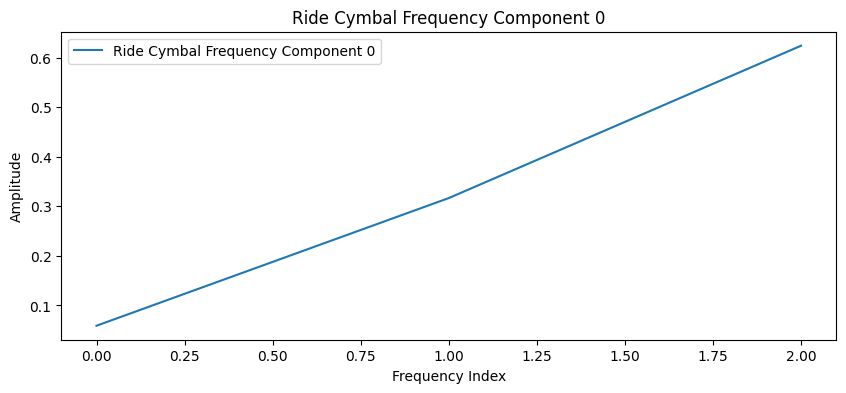

Crash Cymbal freq_components shape: (3, 1)


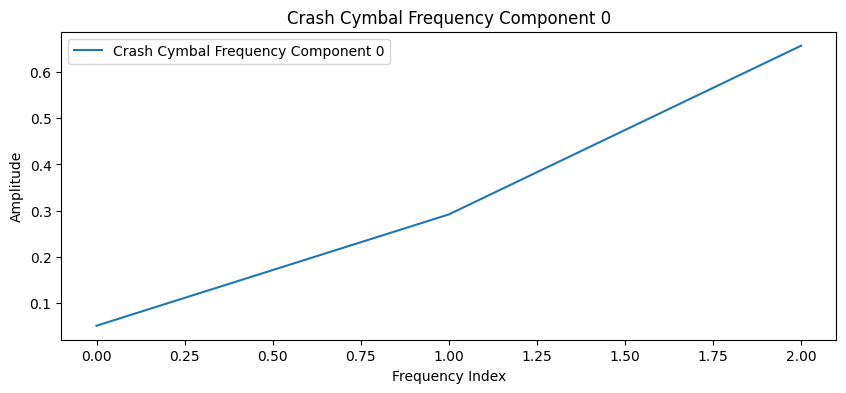

Hi-Hat freq_components shape: (1, 1)


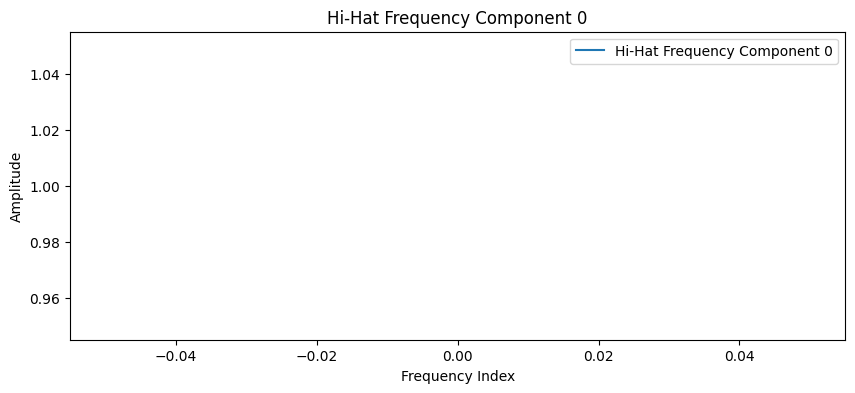

Snare Drum freq_components shape: (9, 1)


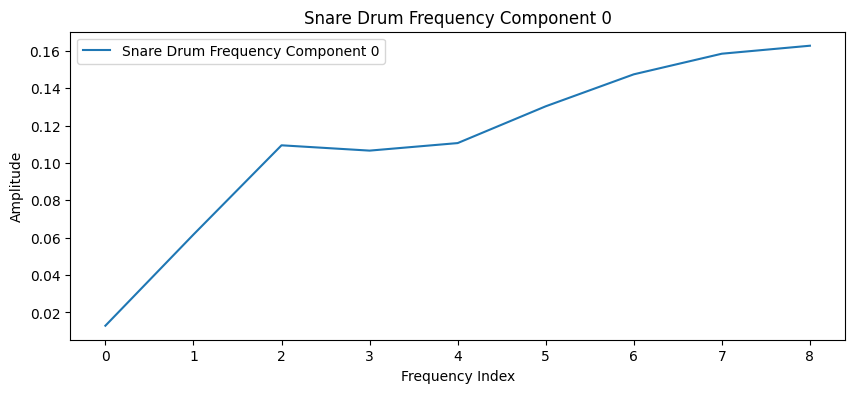

Kick Drum freq_components shape: (36, 1)


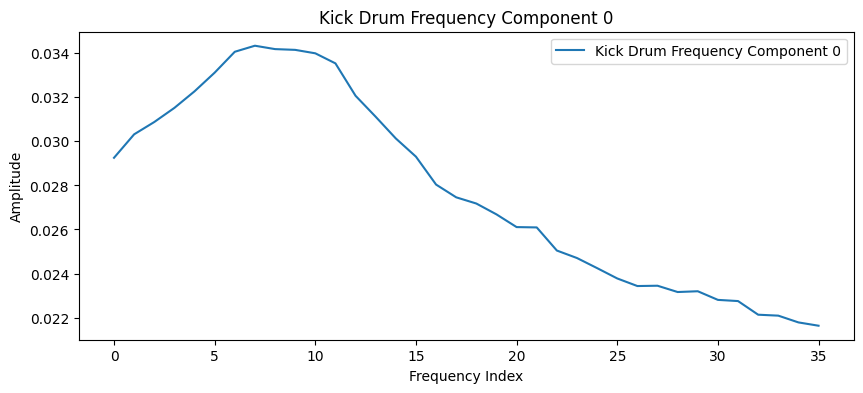

Floor Tom freq_components shape: (14, 1)


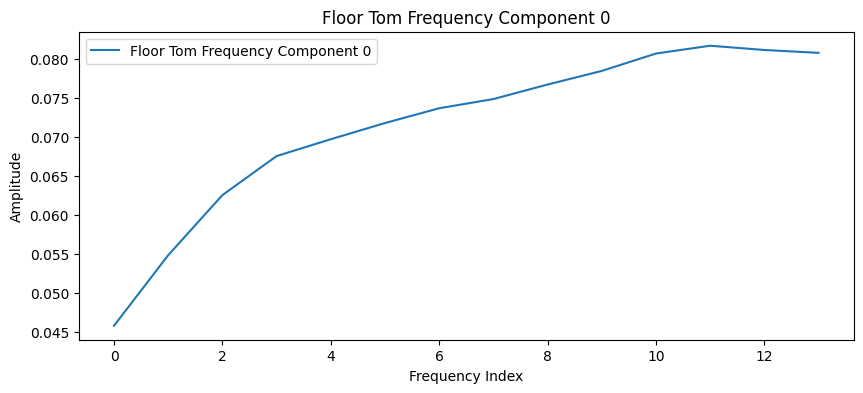

Mid Tom freq_components shape: (9, 1)


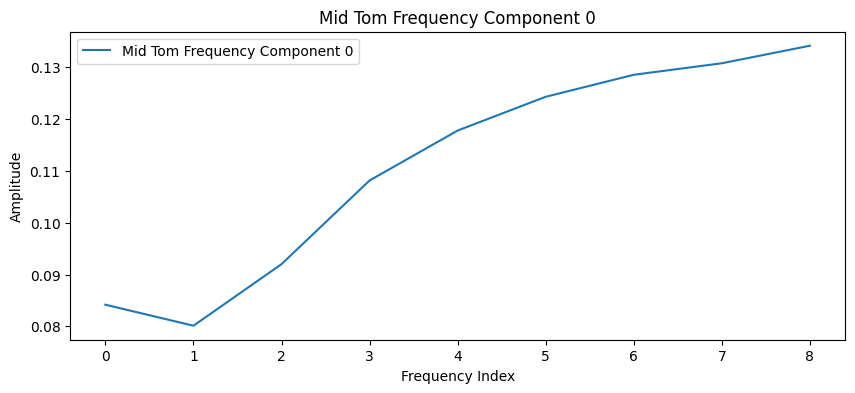

High Tom freq_components shape: (7, 1)


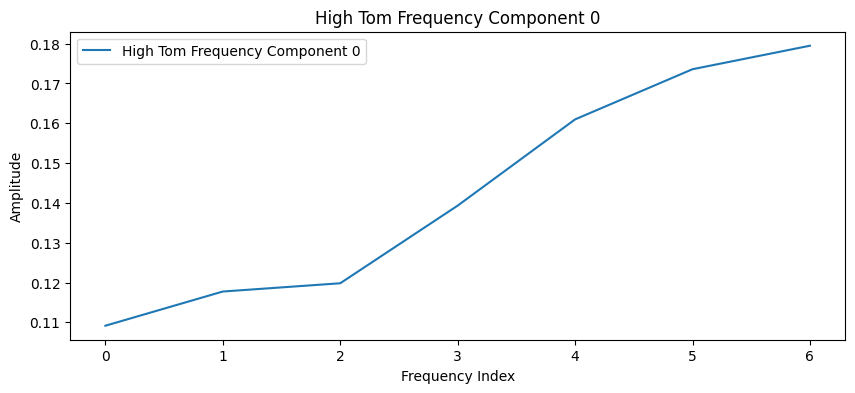

In [ ]:
for drum, (freq_components, time_components) in plca_results.items():
    print(f"{drum} freq_components shape: {freq_components.shape}")

    # 주파수 성분 시각화
    plt.figure(figsize=(10, 4))
    plt.plot(freq_components[:, 0], label=f'{drum} Frequency Component 0')
    plt.legend()
    plt.title(f'{drum} Frequency Component 0')
    plt.xlabel('Frequency Index')
    plt.ylabel('Amplitude')
    plt.show()


# STFT 적용

CWT가 너무 오래 걸려서 주파수 변환으로 STFT 적용

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt


# STFT 변환
n_fft = 2048  # FFT 크기
hop_length = 512  # 윈도우 이동 간격
stft_result = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)

# STFT 스펙트로그램 생성
spectrogram = np.abs(stft_result)  # 복소수 -> 절대값


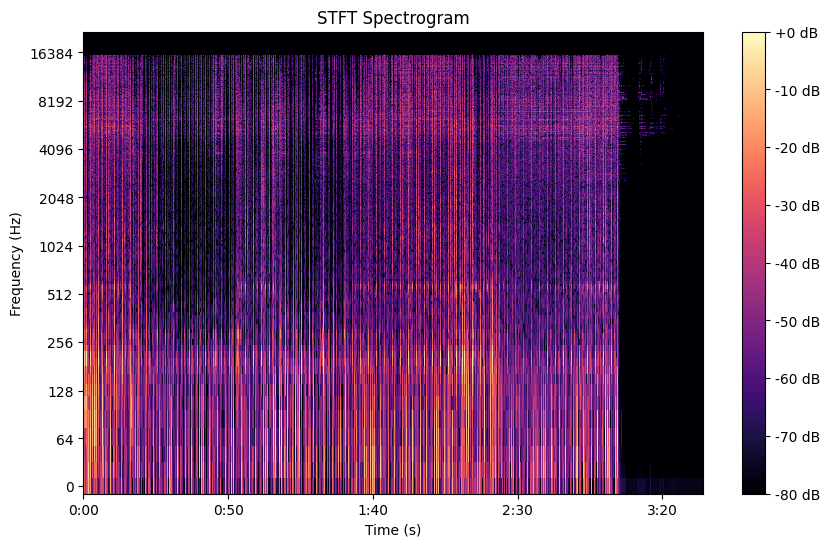

In [ ]:
plt.figure(figsize=(10, 6))
librosa.display.specshow(librosa.amplitude_to_db(spectrogram, ref=np.max),
                         sr=sr, hop_length=hop_length, y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title("STFT Spectrogram")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()


In [ ]:
# 드럼 요소별 주파수 대역 (Hz)
drum_frequencies = {
    "Ride Cymbal": (300, 4000),
    "Crash Cymbal": (400, 8000),
    "Hi-Hat": (2000, 8000),
    "Snare Drum": (100, 2000),
    "Kick Drum": (20, 100),
    "Floor Tom": (50, 200),
    "Mid Tom": (80, 300),
    "High Tom": (100, 400),
}

# 필터링 함수
def filter_spectrogram(spectrogram, sr, freq_range):
    """주파수 대역 필터링"""
    freq_bins = np.linspace(0, sr // 2, spectrogram.shape[0])  # STFT 주파수 축
    min_idx = np.searchsorted(freq_bins, freq_range[0])  # 최소 주파수 인덱스
    max_idx = np.searchsorted(freq_bins, freq_range[1])  # 최대 주파수 인덱스
    return spectrogram[min_idx:max_idx]

# 드럼 요소별 스펙트로그램 추출
filtered_spectrograms = {}
for drum, freq_range in drum_frequencies.items():
    filtered_spectrograms[drum] = filter_spectrogram(spectrogram, sr, freq_range)
    print(f"{drum} filtered spectrogram shape: {filtered_spectrograms[drum].shape}")


Ride Cymbal filtered spectrogram shape: (172, 18449)
Crash Cymbal filtered spectrogram shape: (353, 18449)
Hi-Hat filtered spectrogram shape: (279, 18449)
Snare Drum filtered spectrogram shape: (88, 18449)
Kick Drum filtered spectrogram shape: (4, 18449)
Floor Tom filtered spectrogram shape: (7, 18449)
Mid Tom filtered spectrogram shape: (10, 18449)
High Tom filtered spectrogram shape: (14, 18449)


PLCA 적용

In [ ]:
def plca(spectrogram, num_components=3, num_iterations=100):
    """
    PLCA 알고리즘을 사용해 입력 스펙트로그램을
    주파수 및 시계열 성분으로 분해합니다.
    """
    num_frequencies, num_time_points = spectrogram.shape
    freq_components = np.random.rand(num_frequencies, num_components)
    time_components = np.random.rand(num_components, num_time_points)

    for _ in range(num_iterations):
        approx = np.dot(freq_components, time_components)
        weights = spectrogram / (approx + 1e-9)
        freq_components *= np.dot(weights, time_components.T)
        time_components *= np.dot(freq_components.T, weights)
        freq_components /= np.sum(freq_components, axis=0)
        time_components /= np.sum(time_components, axis=1, keepdims=True)

    return freq_components, time_components


In [ ]:
plca_results = {}
for drum, filtered_spectrogram in filtered_spectrograms.items():
    print(f"Applying PLCA for {drum}...")
    freq_components, time_components = plca(filtered_spectrogram, num_components=3)
    plca_results[drum] = (freq_components, time_components)


Applying PLCA for Ride Cymbal...
Applying PLCA for Crash Cymbal...
Applying PLCA for Hi-Hat...
Applying PLCA for Snare Drum...
Applying PLCA for Kick Drum...
Applying PLCA for Floor Tom...
Applying PLCA for Mid Tom...
Applying PLCA for High Tom...


Visualizing PLCA results for Ride Cymbal...


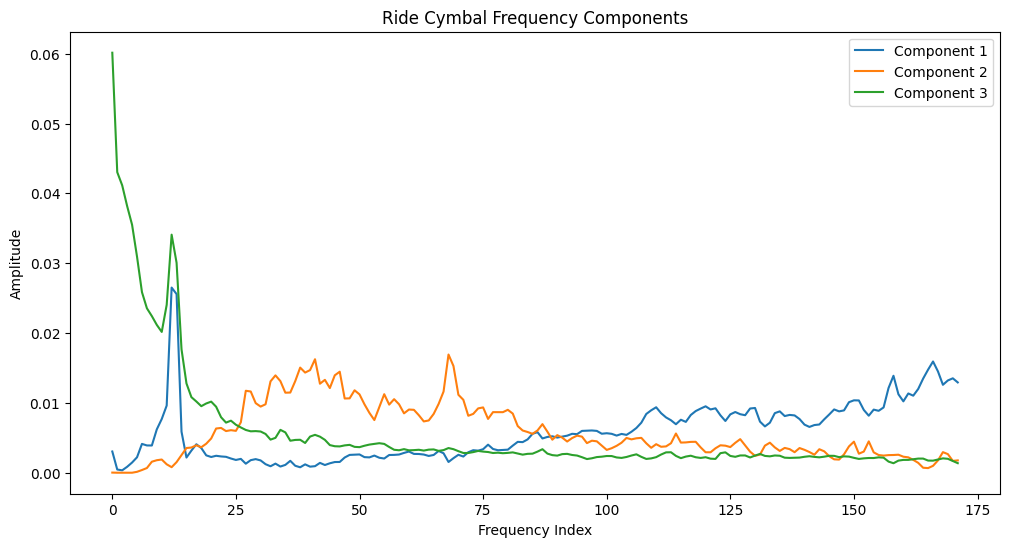

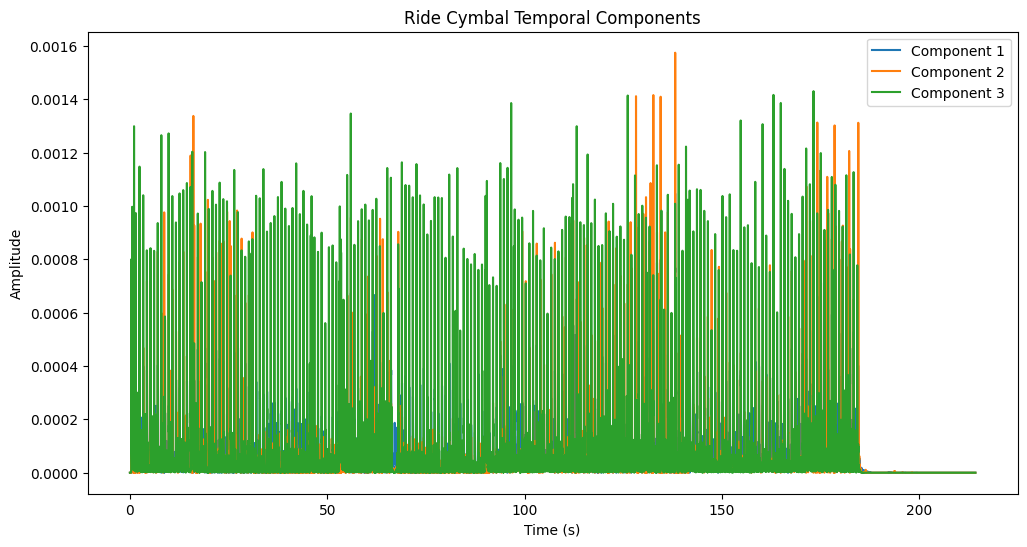

Visualizing PLCA results for Crash Cymbal...


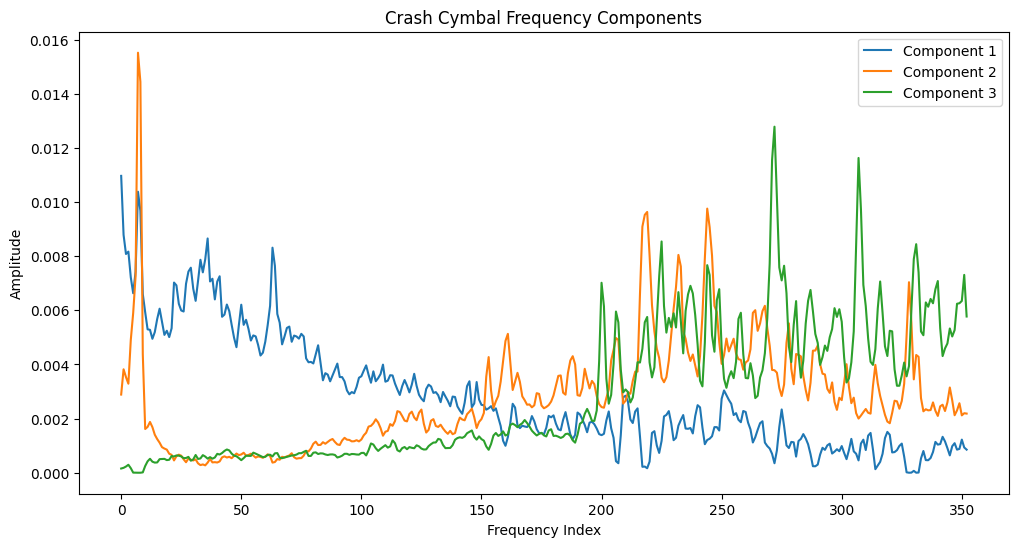

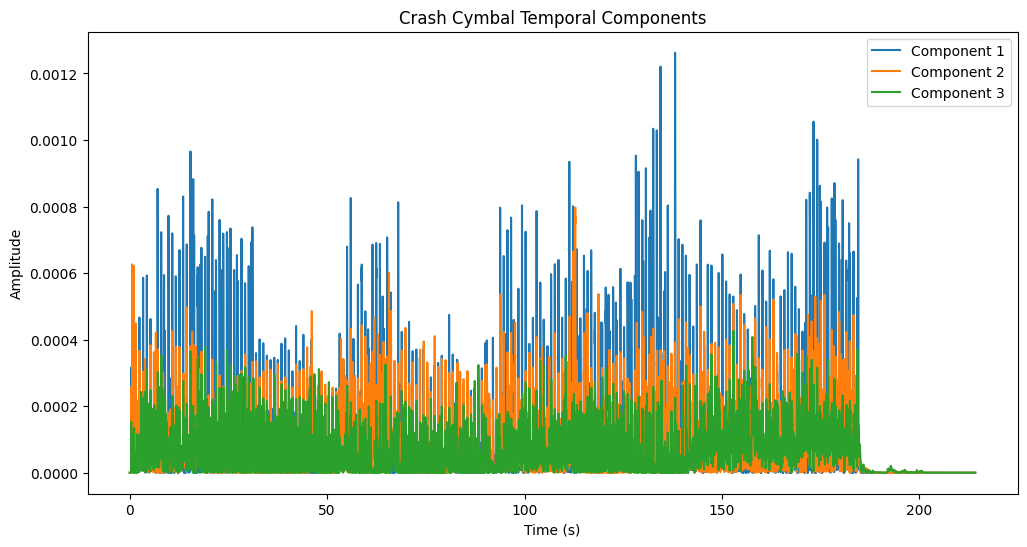

Visualizing PLCA results for Hi-Hat...


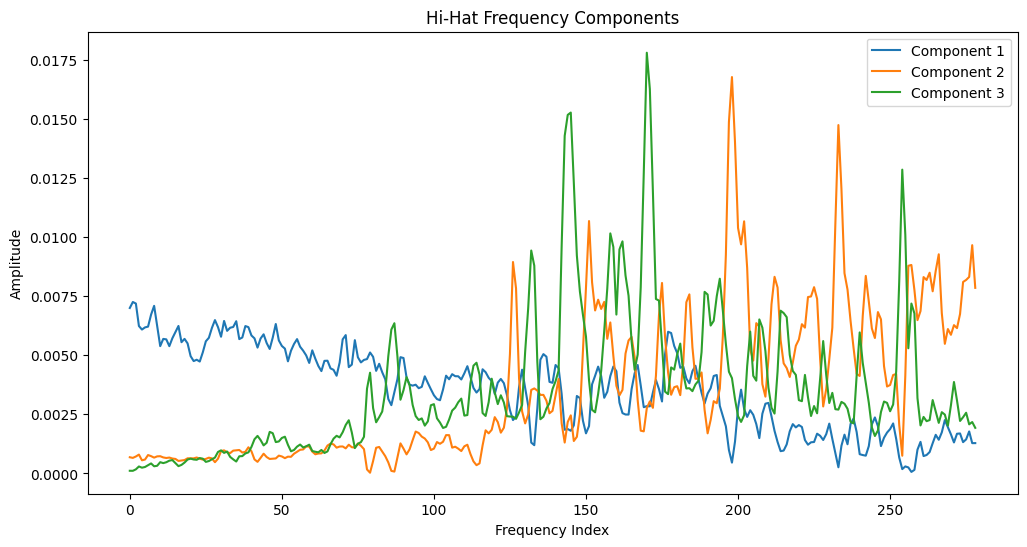

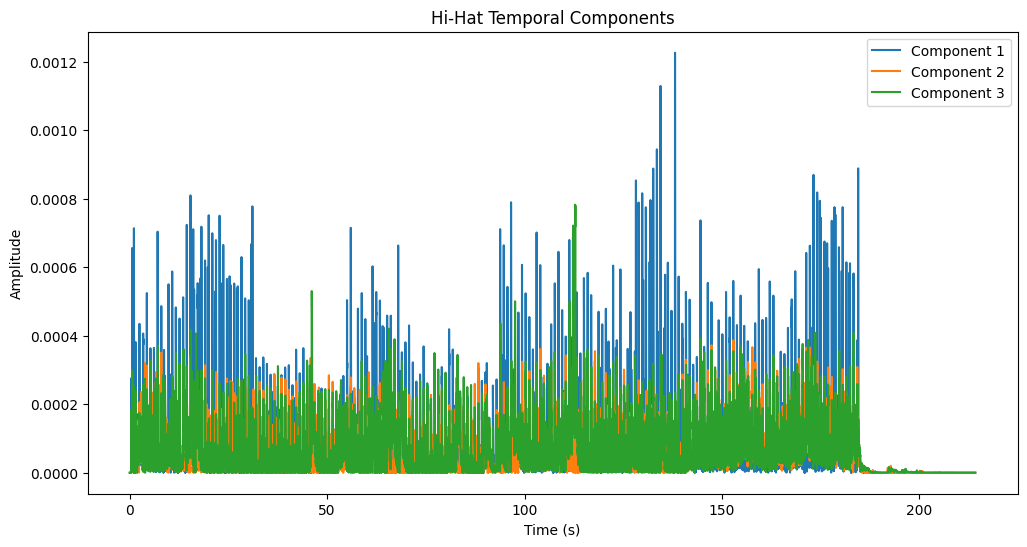

Visualizing PLCA results for Snare Drum...


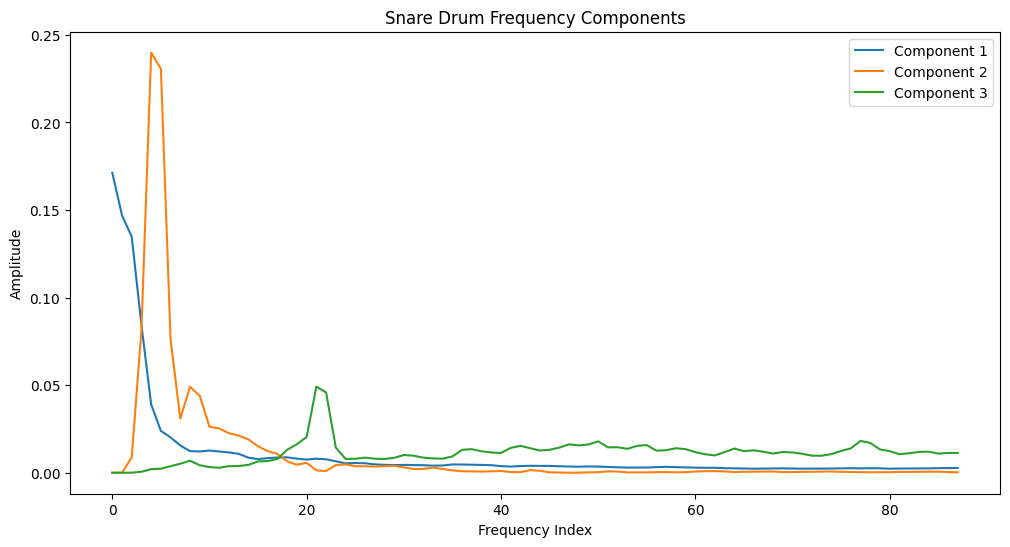

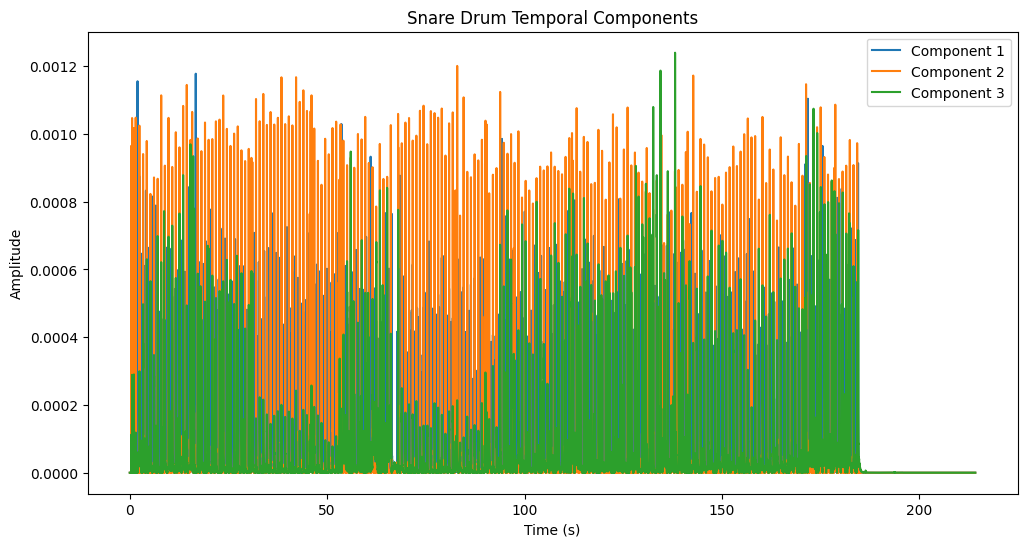

Visualizing PLCA results for Kick Drum...


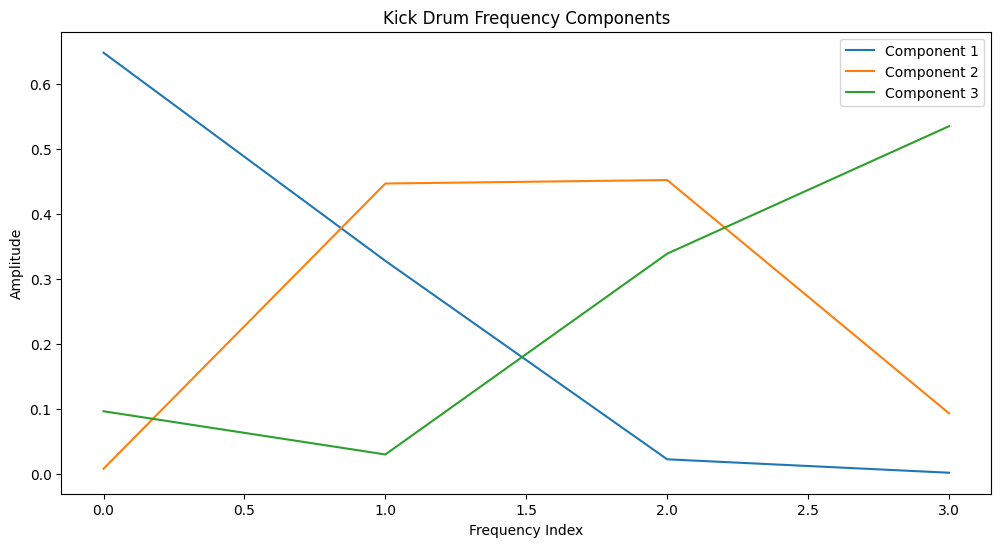

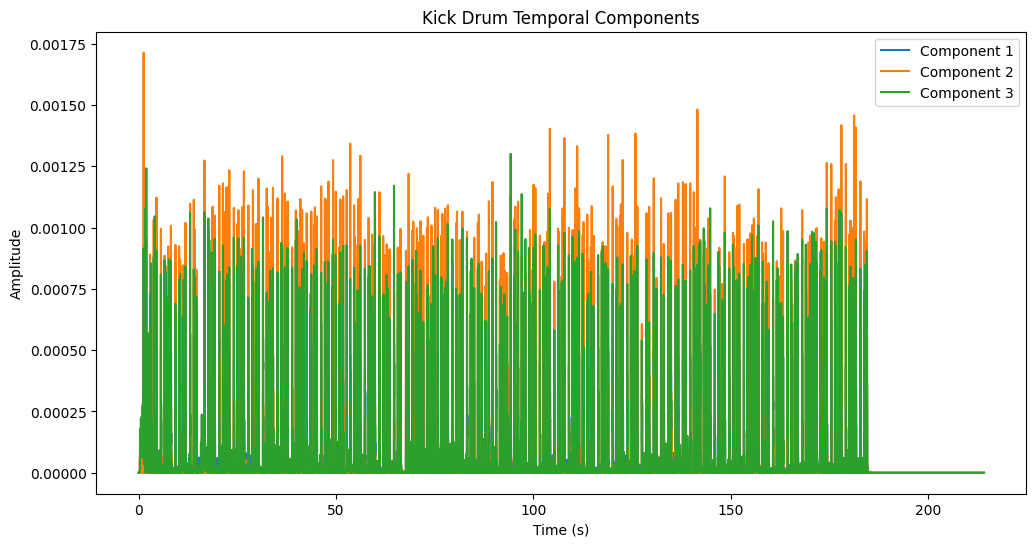

Visualizing PLCA results for Floor Tom...


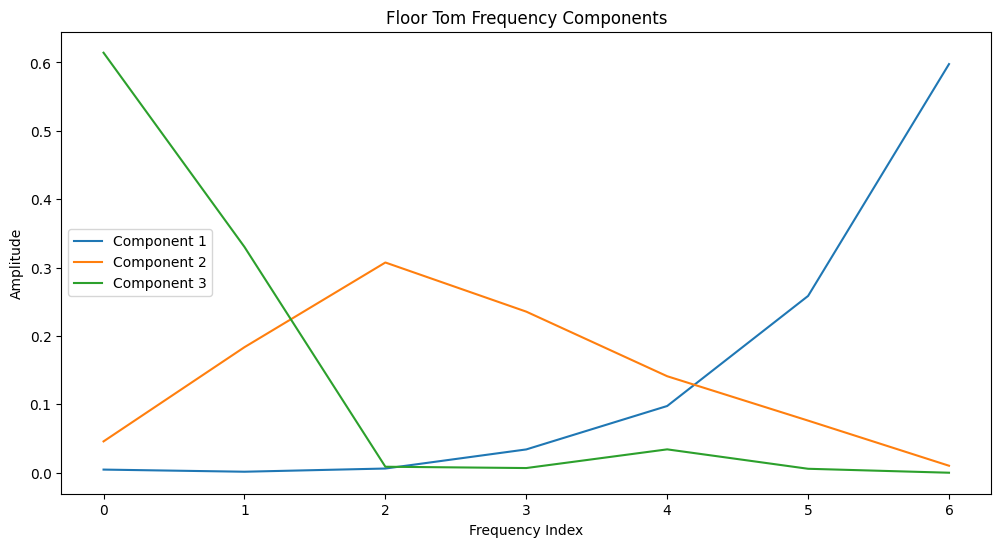

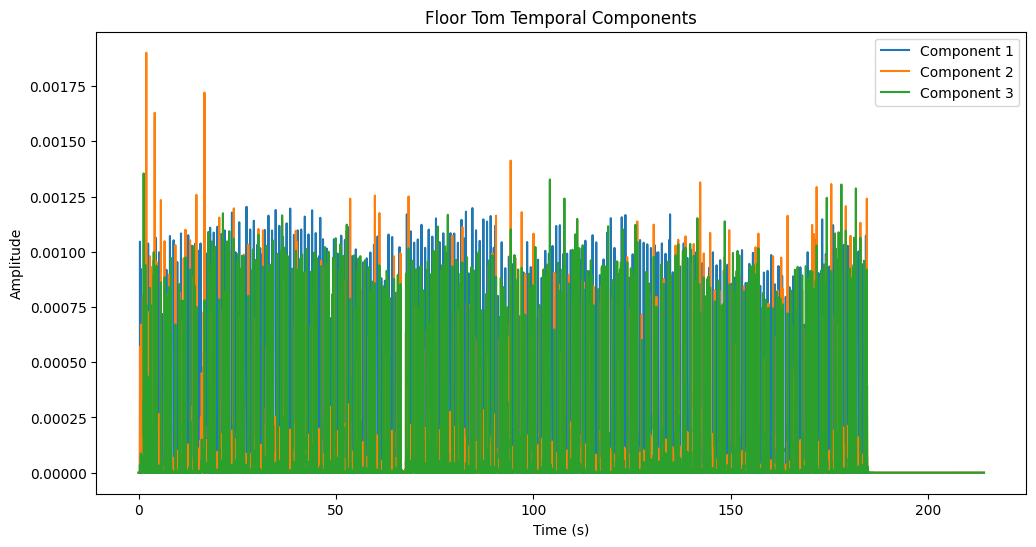

Visualizing PLCA results for Mid Tom...


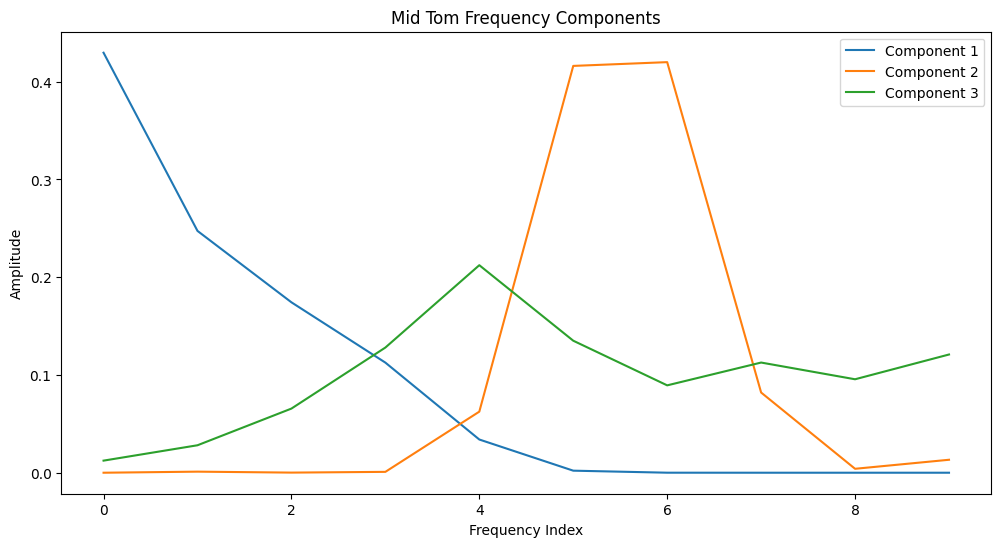

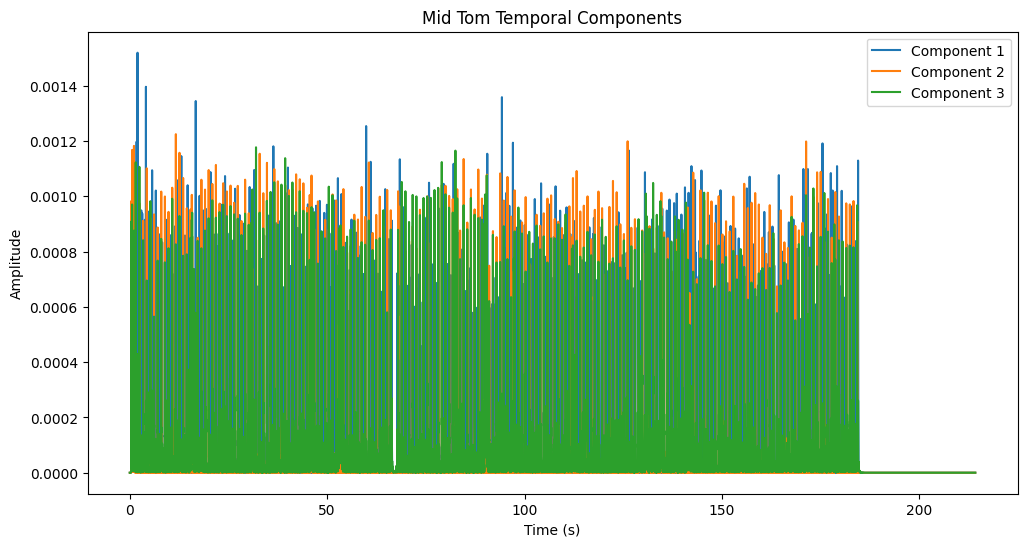

Visualizing PLCA results for High Tom...


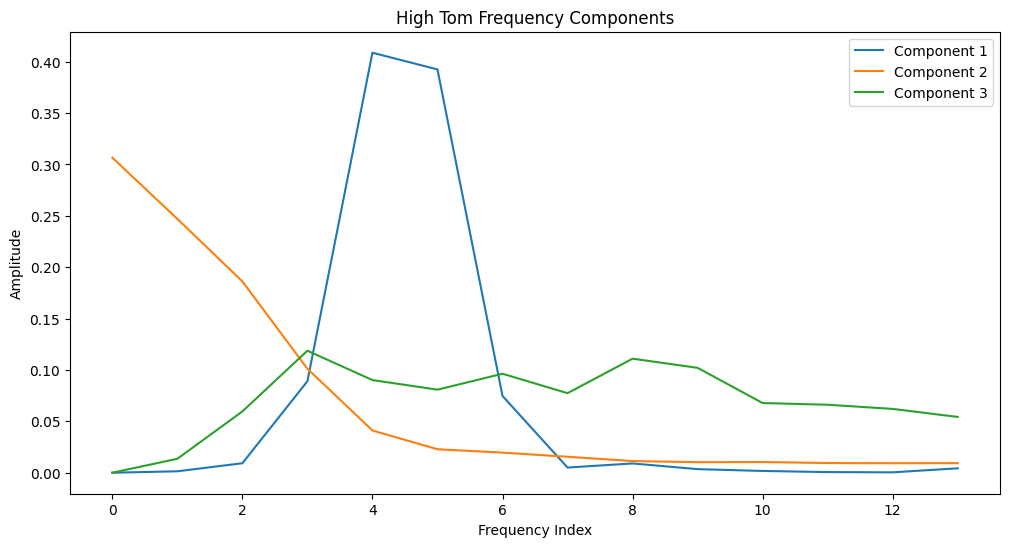

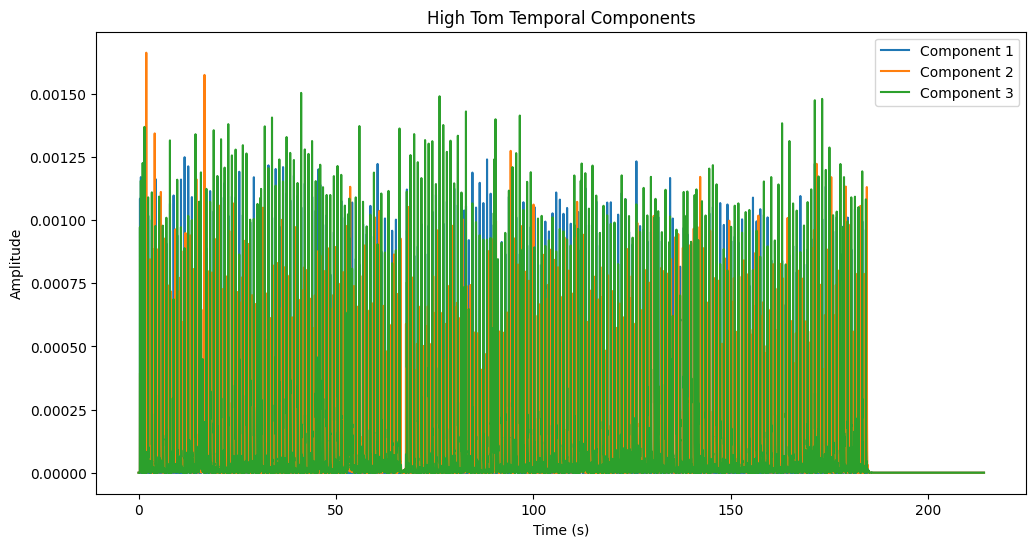

In [ ]:
import matplotlib.pyplot as plt

# PLCA 결과 시각화 함수
def visualize_plca_results(plca_results, sr, hop_length):
    """
    PLCA 결과를 시각화합니다.

    Args:
    - plca_results: PLCA 결과 딕셔너리 (각 드럼 요소별 freq_components, time_components).
    - sr: 샘플링 레이트.
    - hop_length: STFT에서 사용된 hop_length (시간 성분을 초로 변환하기 위함).
    """
    for drum, (freq_components, time_components) in plca_results.items():
        print(f"Visualizing PLCA results for {drum}...")

        # 주파수 성분 시각화
        plt.figure(figsize=(12, 6))
        for i in range(freq_components.shape[1]):  # 각 주파수 성분 시각화
            plt.plot(freq_components[:, i], label=f"Component {i+1}")
        plt.title(f"{drum} Frequency Components")
        plt.xlabel("Frequency Index")
        plt.ylabel("Amplitude")
        plt.legend()
        plt.show()

        # 시간 성분 시각화
        plt.figure(figsize=(12, 6))
        time_axis = np.arange(time_components.shape[1]) * hop_length / sr  # 시간 축 (초 단위)
        for i in range(time_components.shape[0]):  # 각 시간 성분 시각화
            plt.plot(time_axis, time_components[i], label=f"Component {i+1}")
        plt.title(f"{drum} Temporal Components")
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.legend()
        plt.show()
        # STFT의 샘플링 레이트(sr)와 hop_length를 전달
visualize_plca_results(plca_results, sr=sr, hop_length=hop_length)



특정 성분의 주요 주파수 확인

In [ ]:
for drum, (freq_components, _) in plca_results.items():
    print(f"{drum} - Component 1 Major Frequency Index: {np.argmax(freq_components[:, 0])}")


Ride Cymbal - Component 1 Major Frequency Index: 12
Crash Cymbal - Component 1 Major Frequency Index: 0
Hi-Hat - Component 1 Major Frequency Index: 1
Snare Drum - Component 1 Major Frequency Index: 0
Kick Drum - Component 1 Major Frequency Index: 0
Floor Tom - Component 1 Major Frequency Index: 6
Mid Tom - Component 1 Major Frequency Index: 0
High Tom - Component 1 Major Frequency Index: 4


특정 시간 성분의 주요 타이밍 확인

In [ ]:
for drum, (_, time_components) in plca_results.items():
    print(f"{drum} - Component 1 Peak Time: {np.argmax(time_components[0]) * hop_length / sr:.2f} seconds")


Ride Cymbal - Component 1 Peak Time: 138.12 seconds
Crash Cymbal - Component 1 Peak Time: 138.14 seconds
Hi-Hat - Component 1 Peak Time: 138.12 seconds
Snare Drum - Component 1 Peak Time: 16.71 seconds
Kick Drum - Component 1 Peak Time: 25.08 seconds
Floor Tom - Component 1 Peak Time: 27.35 seconds
Mid Tom - Component 1 Peak Time: 1.96 seconds
High Tom - Component 1 Peak Time: 11.67 seconds


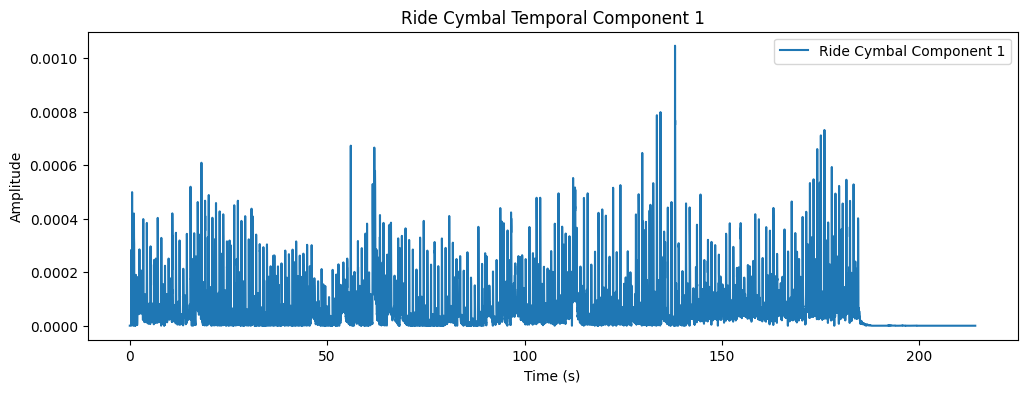

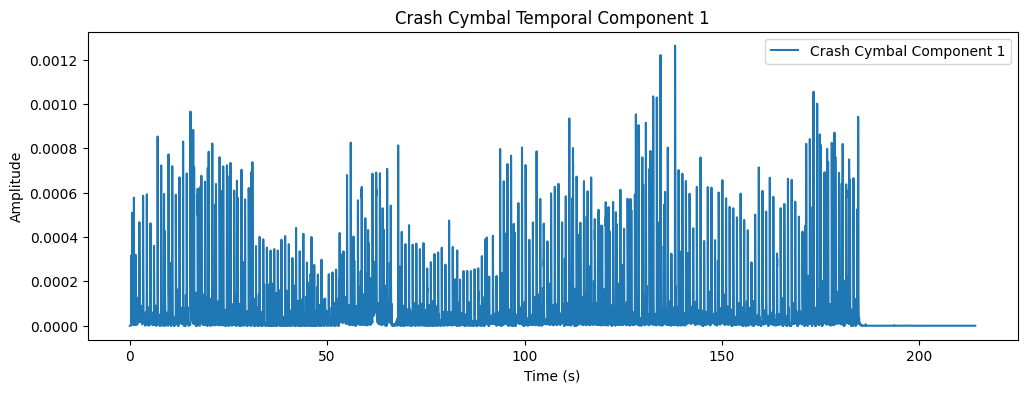

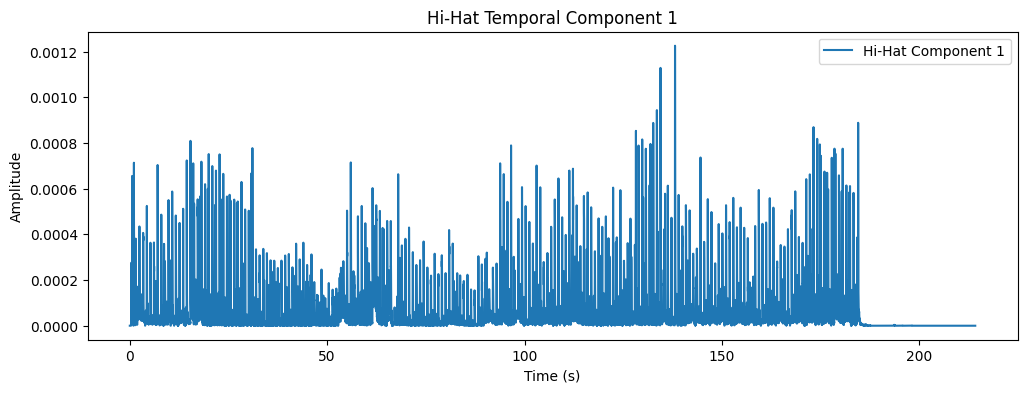

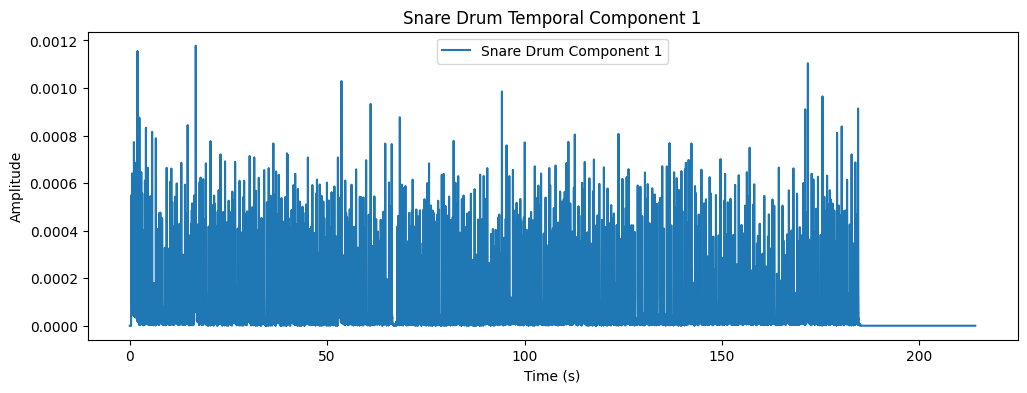

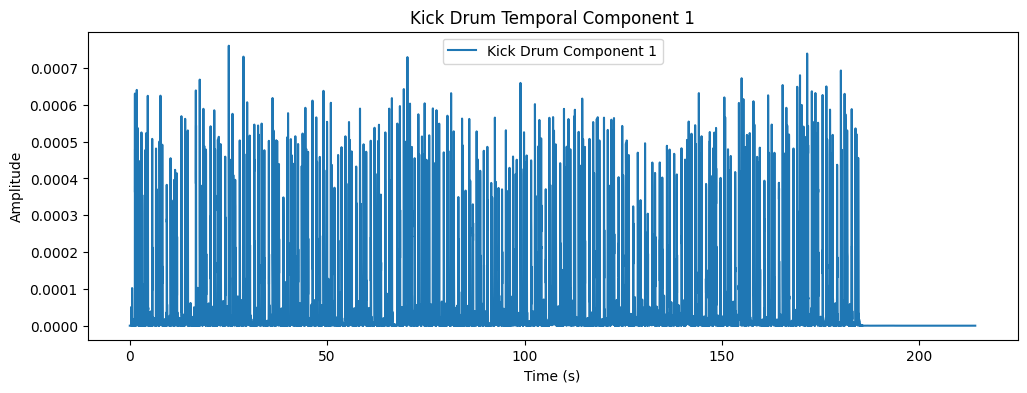

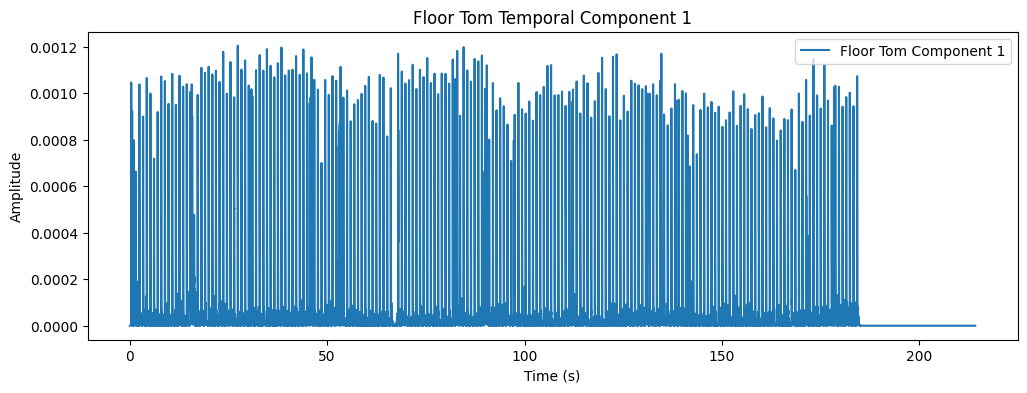

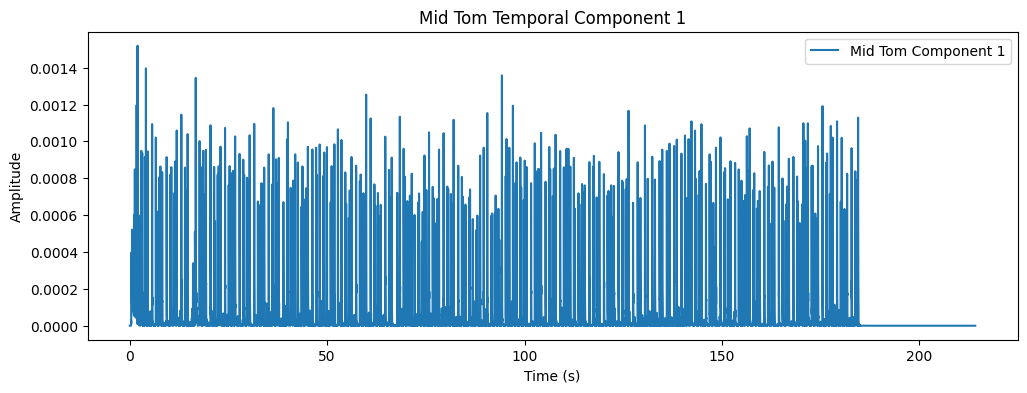

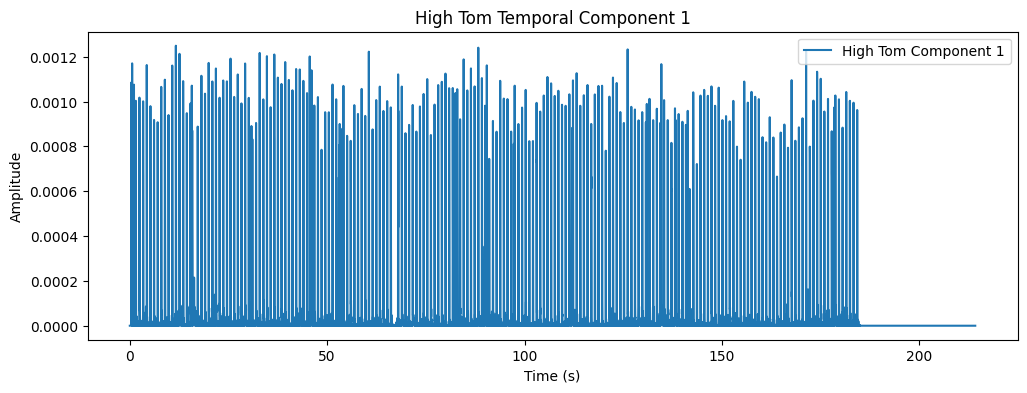

In [ ]:
# PLCA 시간 성분 시각화
for drum, (_, time_components) in plca_results.items():
    plt.figure(figsize=(12, 4))
    time_axis = np.arange(time_components.shape[1]) * hop_length / sr
    plt.plot(time_axis, time_components[0], label=f"{drum} Component 1")
    plt.title(f"{drum} Temporal Component 1")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.show()


유클리디안 거리 적용

In [ ]:
from scipy.spatial.distance import euclidean

def filter_time_components_by_distance(time_components, threshold=0.5):
    """
    PLCA로 분해된 시간 성분을 유클리디안 거리로 필터링합니다.

    Args:
    - time_components: 분해된 시간 성분 (num_components, num_time_points).
    - threshold: 거리 임계값. 이 값보다 큰 거리의 성분은 무시.

    Returns:
    - 중요한 성분만 남긴 time_components.
    """
    num_components = time_components.shape[0]
    important_components = []

    for i in range(num_components):
        # 주요 성분 (Component 0)을 기준으로 거리 계산
        dist = euclidean(time_components[0], time_components[i])
        if dist <= threshold:
            important_components.append(time_components[i])

    return np.array(important_components)

# PLCA 시간 성분 필터링
filtered_time_components = {}
for drum, (_, time_components) in plca_results.items():
    filtered_time_components[drum] = filter_time_components_by_distance(time_components, threshold=0.5)
    print(f"{drum}: Filtered time components shape: {filtered_time_components[drum].shape}")


Ride Cymbal: Filtered time components shape: (3, 18449)
Crash Cymbal: Filtered time components shape: (3, 18449)
Hi-Hat: Filtered time components shape: (3, 18449)
Snare Drum: Filtered time components shape: (3, 18449)
Kick Drum: Filtered time components shape: (3, 18449)
Floor Tom: Filtered time components shape: (3, 18449)
Mid Tom: Filtered time components shape: (3, 18449)
High Tom: Filtered time components shape: (3, 18449)


In [ ]:
# 온셋 검출 재적용
filtered_onset_results = {}
for drum, time_components in filtered_time_components.items():
    if time_components.size > 0:
        filtered_signal = apply_threshold(time_components[0])  # 첫 번째 성분만 사용 (주요 성분)
        onsets = detect_onsets(filtered_signal)
        filtered_onset_results[drum] = onsets
        print(f"{drum}: Filtered onsets at frames {onsets}")


Ride Cymbal: Filtered onsets at frames [   31    49    89   129   168   207   209   220   241   243   263   265
   290   331   369   450   526   567   606   686   726   767   804   845
   905   924  1004  1084  1161  1165  1203  1242  1321  1346  1353  1361
  1383  1400  1439  1480  1522  1539  1560  1602  1641  1660  1698  1719
  1761  1798  1840  1857  1878  1939  1957  1979  2016  2037  2078  2116
  2176  2197  2277  2297  2334  2354  2395  2434  2495  2516  2596  2615
  2653  2673  2698  2714  2754  2795  2833  2913  2932  2991  3031  3072
  3111  3131  3152  3192  3212  3231  3250  3310  3390  3430  3450  3470
  3549  3568  3608  3628  3668  3708  3747  3787  3828  3846  3867  3885
  3927  3946  3964  4026  4107  4184  4222  4265  4347  4425  4464  4504
  4552  4580  4582  4600  4608  4647  4659  4663  4666  4699  4739  4780
  4819  4859  4899  4937  4977  5018  5059  5097  5137  5176  5216  5255
  5296  5365  5370  5376  5415  5454  5496  5516  5533  5572  5613  5654
  5675  5692

In [ ]:
import librosa
import numpy as np

# 샘플링 레이트와 hop length 설정
sr = 44100  # 샘플링 레이트 (초당 44100 샘플)
hop_length = 512  # 프레임 간 샘플 수

# 모든 드럼의 프레임 데이터를 합치고 중복 제거
all_onset_frames = np.concatenate(list(onset_results.values()))
unique_onset_frames = np.unique(all_onset_frames)

# 프레임 데이터를 시간(초) 단위로 변환
all_onset_times = librosa.frames_to_time(unique_onset_frames, sr=sr, hop_length=hop_length)

# 결과 출력
print("All drum hit onsets in seconds:")
print(all_onset_times)


All drum hit onsets in seconds:
[  0.34829932   0.3599093    0.55727891 ... 184.27356009 184.48253968
 184.50575964]


In [ ]:
import os
import numpy as np
import pandas as pd

# 예시: 변환된 초 단위 온셋 데이터
# onset_times_in_seconds가 이미 있다 가정
# onset_times_in_seconds = np.array([...])  # 이 데이터를 미리 만들어 놓으세요

# 파일 저장 경로
save_path = '/content/drive/My Drive/soundAI/'
file_name = 'all_drum_onsets_seconds.csv'

# 디렉터리가 없으면 생성
os.makedirs(save_path, exist_ok=True)

# 데이터프레임으로 변환 및 저장
df = pd.DataFrame(onset_times_in_seconds, columns=["Drum Hit Onsets (Seconds)"])
csv_file_path = os.path.join(save_path, file_name)
df.to_csv(csv_file_path, index=False)

print(f"CSV file saved at: {csv_file_path}")


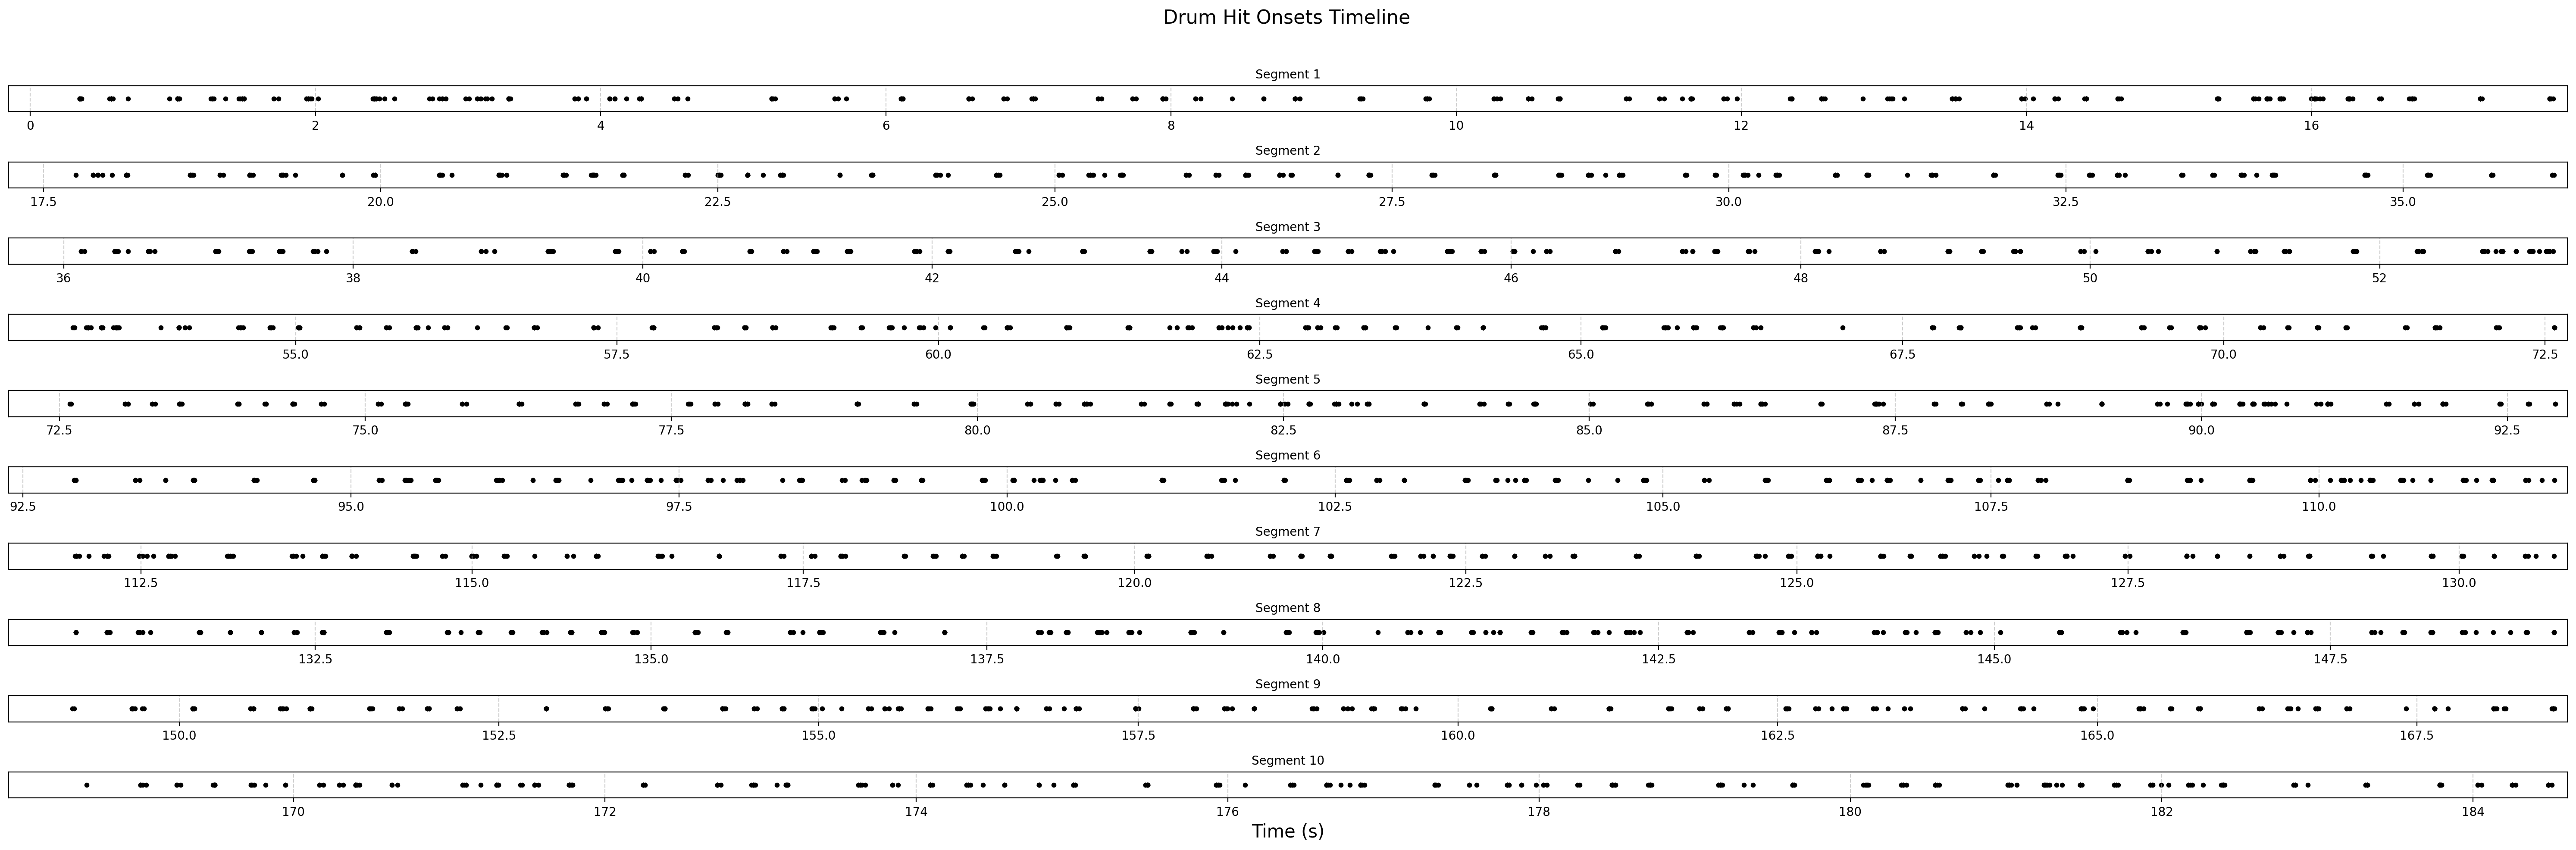

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 모든 드럼 요소의 Onset Time을 하나로 합치기
onsets = []  # 통합된 온셋 데이터를 저장할 리스트
for drum, frames in filtered_onset_results.items():
    # 프레임 단위의 온셋을 초 단위로 변환 (샘플링 레이트와 hop_length 필요)
    onsets.extend(frames * hop_length / sr)  # frames → seconds 변환

# Onset Time 정렬
onsets = sorted(onsets)

# Onset Time을 num_segments로 나누어 분할 표시
num_segments = 10
split_onsets = np.array_split(onsets, num_segments)

# 그래프 그리기
fig, axes = plt.subplots(num_segments, 1, figsize=(30, 10), sharex=False)  # 분할 플롯 생성
fig.suptitle("Drum Hit Onsets Timeline", fontsize=16)

for i, ax in enumerate(axes):
    if len(split_onsets[i]) > 0:  # 분할된 Onset 데이터가 있을 경우에만 그리기
        ax.scatter(split_onsets[i], np.ones(len(split_onsets[i])), color='black', marker='o', s=10)
        ax.set_xlim(min(split_onsets[i]) - 0.5, max(split_onsets[i]) + 0.1)  # 각 줄의 x축 범위 조정
    ax.set_yticks([])  # y축 제거
    ax.grid(True, axis='x', linestyle='--', alpha=0.6)  # x축 그리드 표시
    ax.set_title(f"Segment {i + 1}", fontsize=10)  # 각 줄에 제목 추가

axes[-1].set_xlabel("Time (s)", fontsize=15)  # 마지막 플롯에 x축 라벨 추가
plt.tight_layout(rect=[0, 0, 1, 0.96])  # 제목과 플롯 간격 조정
plt.show()


In [ ]:
import os
import numpy as np
import pandas as pd

# 예시: 변환된 초 단위 온셋 데이터
# onset_times_in_seconds가 이미 있다 가정
# onset_times_in_seconds = np.array([...])  # 이 데이터를 미리 만들어 놓으세요

# 파일 저장 경로
save_path = '/content/drive/My Drive/soundAI/'
file_name = 'all_drum_onsets_seconds.csv'

# 디렉터리가 없으면 생성
os.makedirs(save_path, exist_ok=True)

# 데이터프레임으로 변환 및 저장
df = pd.DataFrame(onset_times_in_seconds, columns=["Drum Hit Onsets (Seconds)"])
csv_file_path = os.path.join(save_path, file_name)
df.to_csv(csv_file_path, index=False)

print(f"CSV file saved at: {csv_file_path}")


CSV file saved at: /content/drive/My Drive/soundAI/all_drum_onsets_seconds.csv


온셋 그리기-커스텀 필요

# 개념

입) CWT 결과, 스케일에 따른 주파수

출) 주파수 성분, 시간성분

plca_results[drum] = (freq_components, time_components)

드럼 요소별 PLCA 결과를 딕셔너리에 저장.

3.  최적의 주파수 성분 선택: 유클리디안 거리

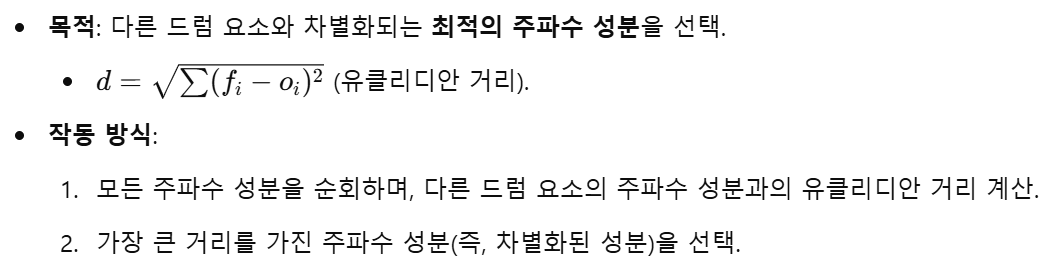

In [ ]:
def find_optimal_frequency(freq_components, other_components):
    """
    다른 드럼 요소와의 유클리디안 거리를 계산하여 가장 차별화되는 주파수 성분을 선택합니다.
    """
    optimal_index = -1
    max_distance = 0

    for i, freq in enumerate(freq_components.T):  # freq는 (num_frequencies,)
        freq_flat = freq.flatten()
        distance = 0
        for other in other_components:
            other_flat = other.flatten()

            # 크기가 다르면 맞춰서 비교
            min_length = min(len(freq_flat), len(other_flat))
            freq_flat = freq_flat[:min_length]
            other_flat = other_flat[:min_length]

            distance += np.linalg.norm(freq_flat - other_flat)
        if distance > max_distance:
            max_distance = distance
            optimal_index = i

    return optimal_index, freq_components[:, optimal_index]



적용

In [ ]:
# 모든 주파수 성분을 동일한 크기로 저장
all_frequency_components = [freq[:freq_components.shape[0]].flatten() for freq, _ in plca_results.values()]

# 각 드럼에 대해 최적 주파수 성분 선택
optimal_freq_components = {}
for drum, (freq_components, _) in plca_results.items():
    optimal_index, optimal_freq = find_optimal_frequency(freq_components, all_frequency_components)
    optimal_freq_components[drum] = optimal_freq
    print(f"{drum}: Optimal frequency component index = {optimal_index}")


Ride Cymbal: Optimal frequency component index = 0
Crash Cymbal: Optimal frequency component index = 0
Hi-Hat: Optimal frequency component index = 0
Snare Drum: Optimal frequency component index = 0
Kick Drum: Optimal frequency component index = 0
Floor Tom: Optimal frequency component index = 0
Mid Tom: Optimal frequency component index = 0
High Tom: Optimal frequency component index = 0


PLCA 결과에서 모든 주파수 성분 중 첫 번째 성분만 선택되고 있다는 의미

3) onset 검출(시계열 성분 기반)

1) threshold 적용: 시계열 데이터에서 노이즈 제거하고 드럼 소리 강한 부분만 남김

In [ ]:
# Threshold 적용
def apply_threshold(time_series, global_thresh=0.01, relative_thresh=0.2):
    time_series = np.where(time_series > global_thresh, time_series, 0)  # 전역 Threshold
    max_value = np.max(time_series)
    time_series = np.where(time_series > relative_thresh * max_value, time_series, 0)  # 상대 Threshold
    return time_series



2) onset 검출: t-1에서 0이고 t에서 값이 0보다 큰 경우를 onset으로 잡음

In [ ]:
# Onset 검출
def detect_onsets(time_series):
    return np.where((time_series > 0) & (np.roll(time_series, 1) == 0))[0]


3) 전체 onset 검출

In [ ]:
# 각 드럼 요소의 Onset 검출
onset_results = {}
for drum, (_, time_components) in plca_results.items():
    filtered_signal = apply_threshold(time_components[0])  # 첫 번째 성분
    onsets = detect_onsets(filtered_signal) # 필터링된 데이터에서 onset 검출
    onset_results[drum] = onsets
    print(f"{drum}: Detected onsets at frames {onsets}")

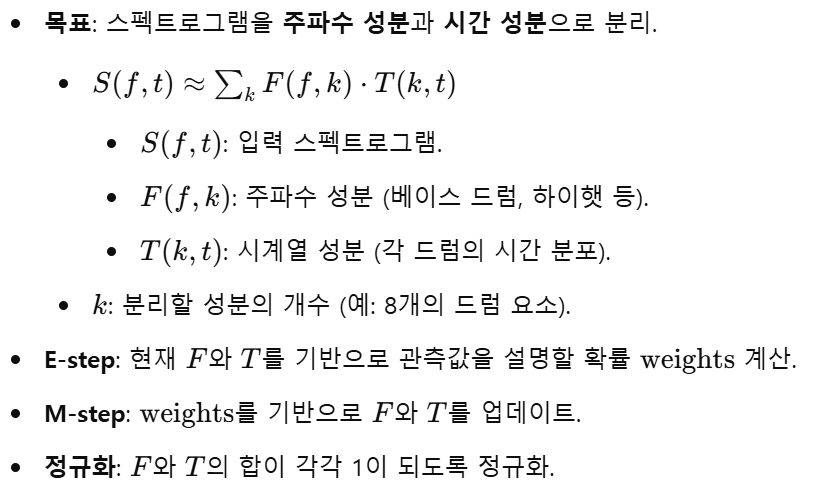

0) 드럼 주파수 대역별로 CWT 변환한 결과를 PLCA에 입력

3. PLCA 적용

in) CWT로 얻은 스펙트로그램

1) 각 드럼요소(8개_에 대해 주파수 성분 추출

2) PLCA 적용하여 주파수 성분 / 시계열 성분으로 분리

3) 최적의 주파수 성분을 찾아 시계열 데이터를 기반으로

4) onset 검출

# onset을 악보에 어떻게 그려낼지